In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
cal_df = pd.read_csv('covid_CA_jan_feb.csv') # California data sent by Shakwat

print(cal_df)

          date  population  hospitalized_confirmed  hospitalized_suspected  \
0   2021-01-01    40129160                   20344                     859   
1   2021-01-02    40129160                   20690                     820   
2   2021-01-03    40129160                   21128                     875   
3   2021-01-04    40129160                   21597                     888   
4   2021-01-05    40129160                   21923                     898   
5   2021-01-06    40129160                   21938                     915   
6   2021-01-07    40129160                   21855                     981   
7   2021-01-08    40129160                   21754                     846   
8   2021-01-09    40129160                   21647                     866   
9   2021-01-10    40129160                   21664                     965   
10  2021-01-11    40129160                   21747                     918   
11  2021-01-12    40129160                   21654              

In [ ]:
#Change date format to YYYY-MM-DD



## Simple simulation with California data

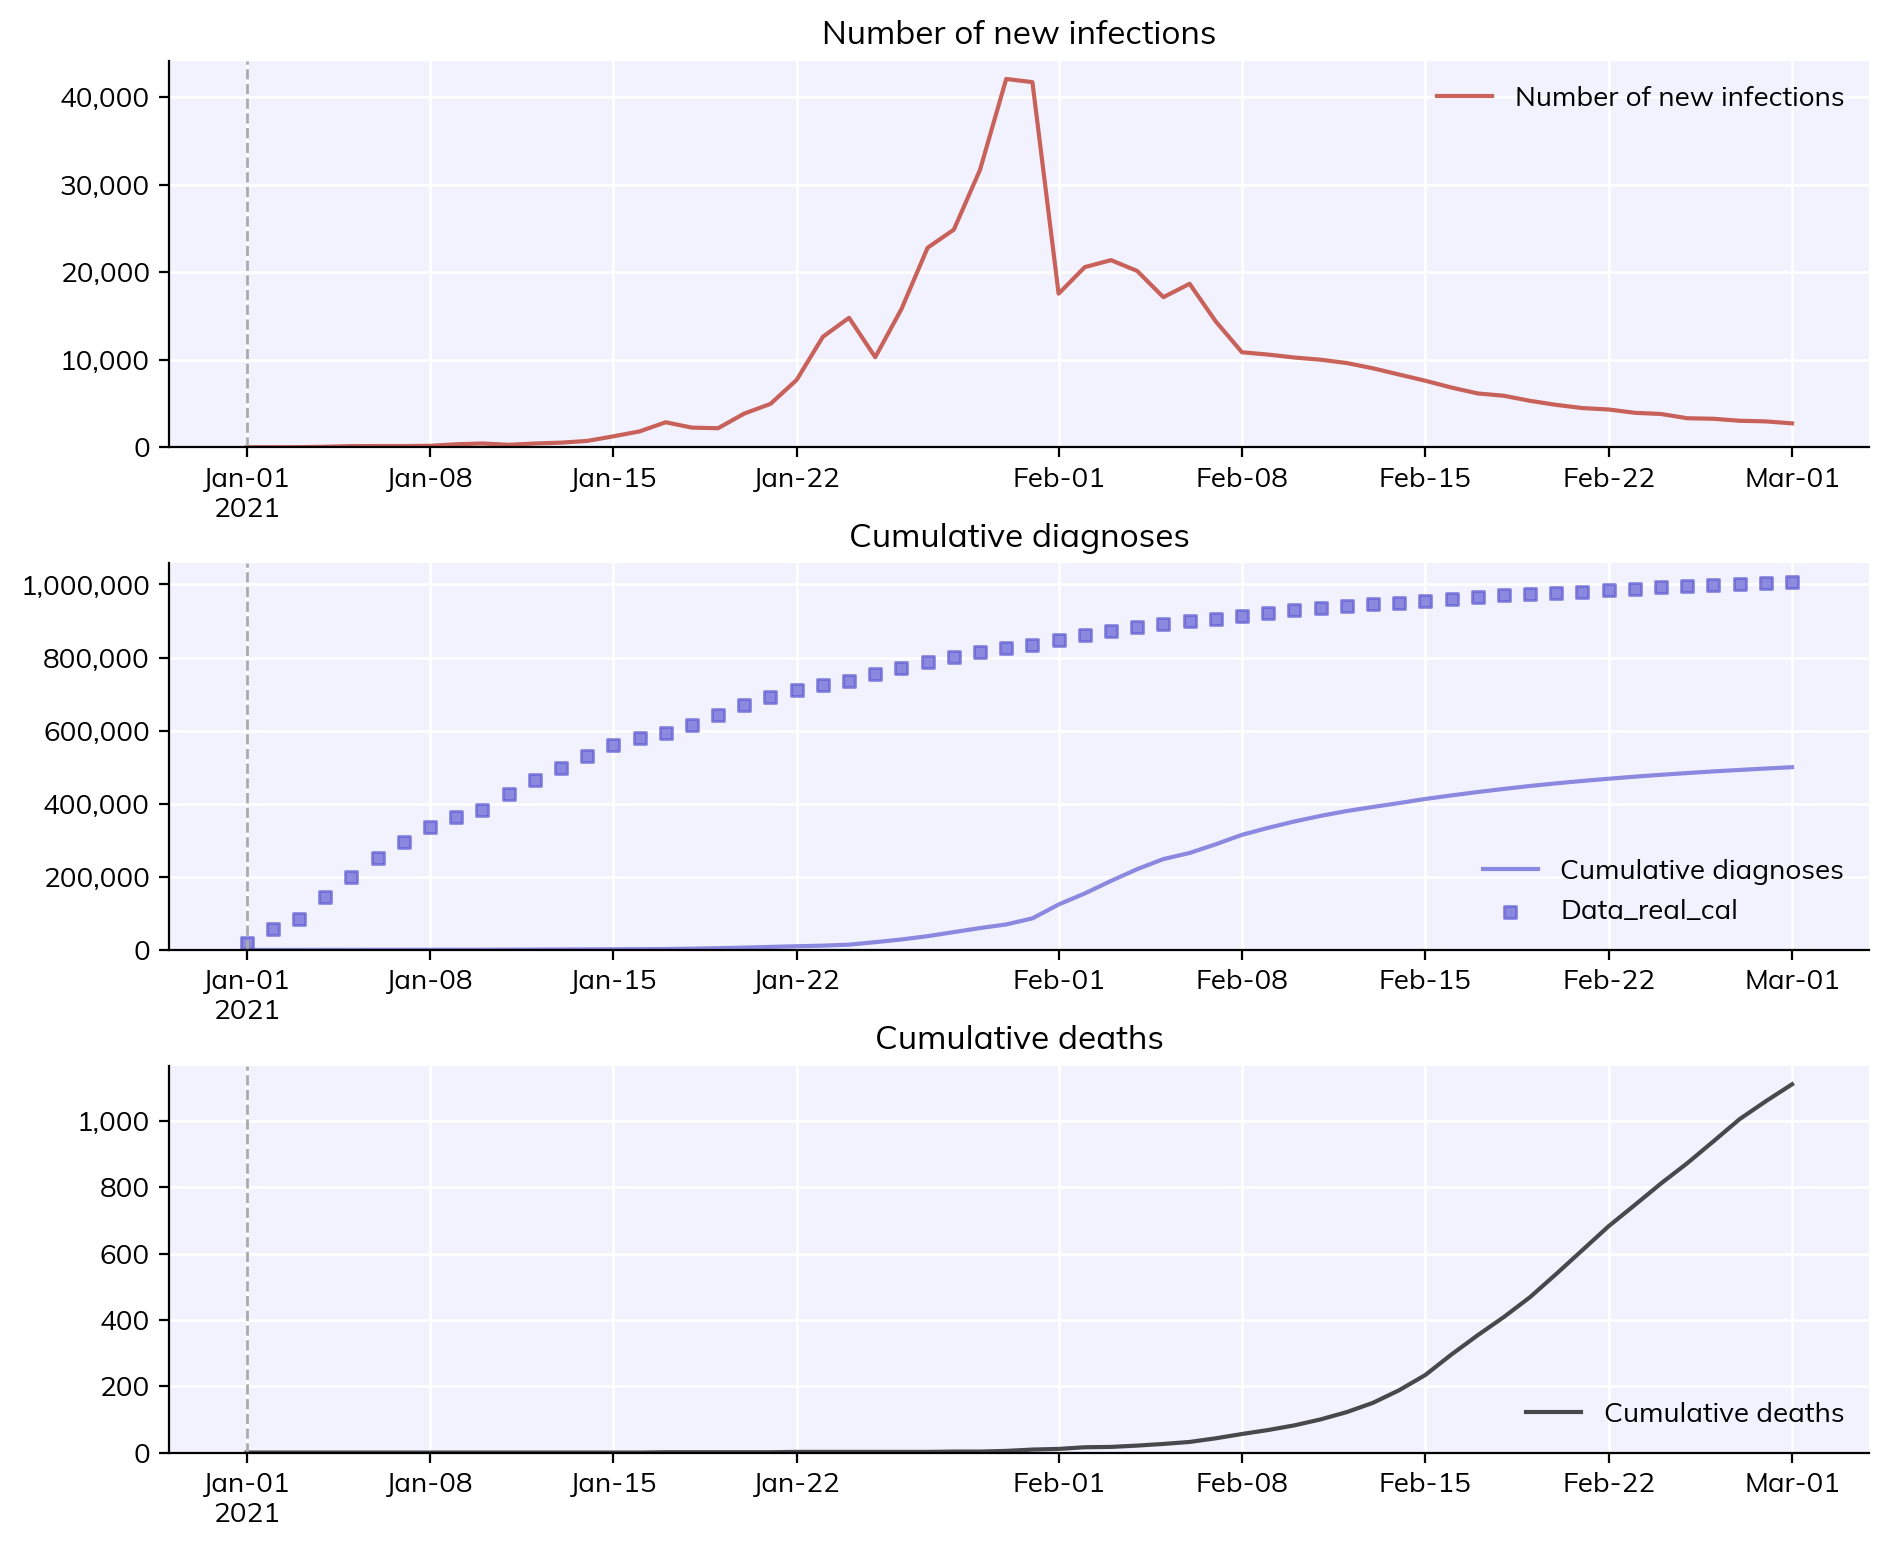

In [7]:
import covasim as cv
cv.options(jupyter=True, verbose=0)

pars = dict(
        pop_size       = 400000,
        #pop_scale      = 40,
        start_day = '2021-01-01',
        end_day   = '2021-03-01',
        beta           = 0.25, #from SIR data
        rel_death_prob = 0.7, #Gained from calibration
        pop_type  = 'hybrid',
        rand_seed = 96, # Random seed for reproducibility
        pop_infected = 200, #Intial infected population
        
)
sim = cv.Sim(pars=pars, datafile='california_data/covid_CA_jan_feb.csv', interventions=cv.test_num(daily_tests='data'))
sim.run()
sim.plot(['new_infections','cum_diagnoses', 'cum_deaths'])

## Adding Interventions - Vaccinations

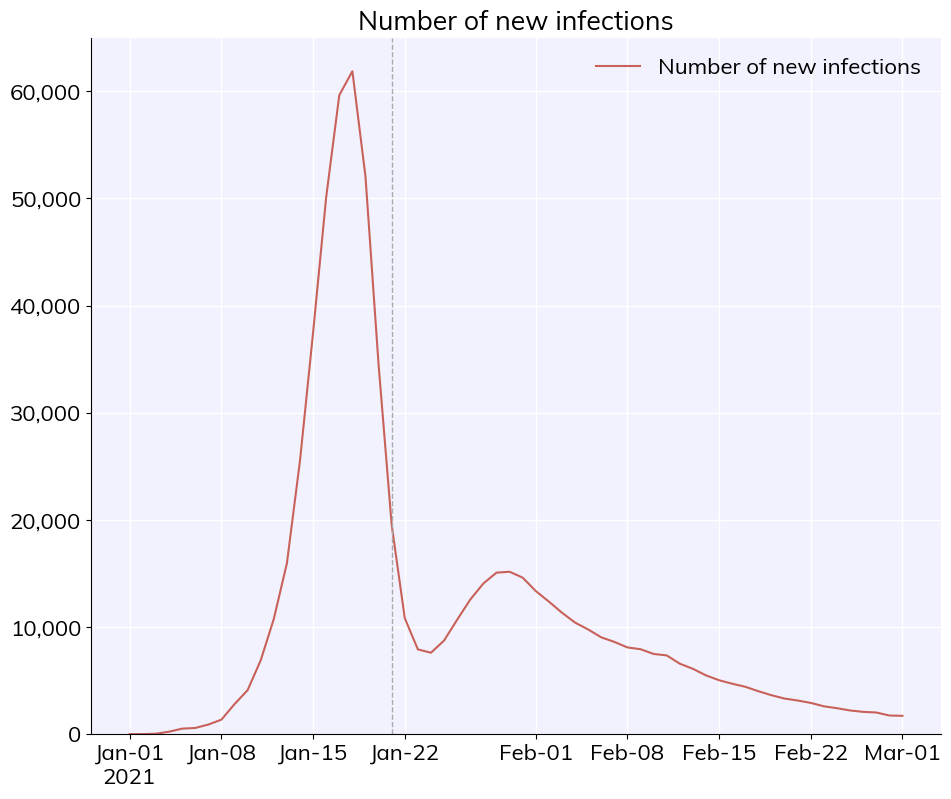

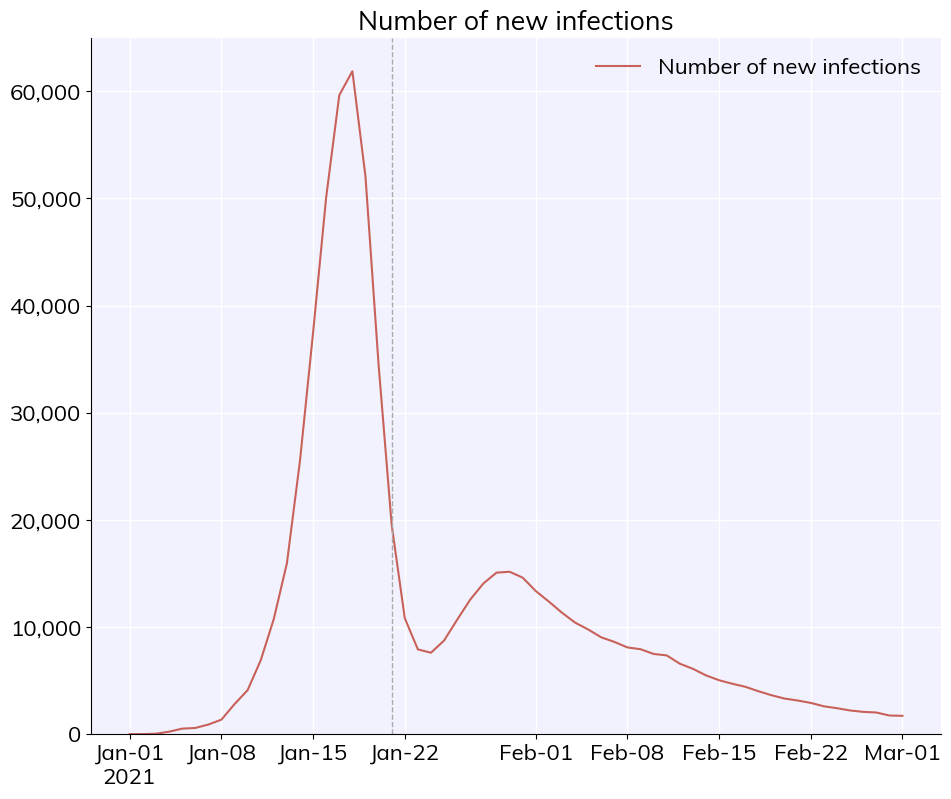

In [27]:
import sciris as sc
import covasim as cv

# Create simulation
pars = sc.objdict(
        pop_size       = 400000,
        start_day = '2021-01-01',
        end_day   = '2021-03-01',
        beta           = 0.19, #Gained from calibration
        rel_death_prob = 0.7, #Gained from calibration
        #interventions  = cv.test_num(daily_tests='data'), # adding number of daily test as an intervention
        verbose        = 0,
        pop_type  = 'hybrid',
        rand_seed = 96, # Random seed for reproducibility
        pop_infected = 200, #Intial infected population
)



# Define probability based vaccination
pfizer = cv.vaccinate_prob(vaccine='pfizer', days=20, prob=0.8)

# Create and run the sim
sim = cv.Sim(pars=pars, interventions=pfizer,datafile='covid_CA_jan_feb.csv')
sim.run()
sim.plot(['new_infections'])

## Testing Interventions California data

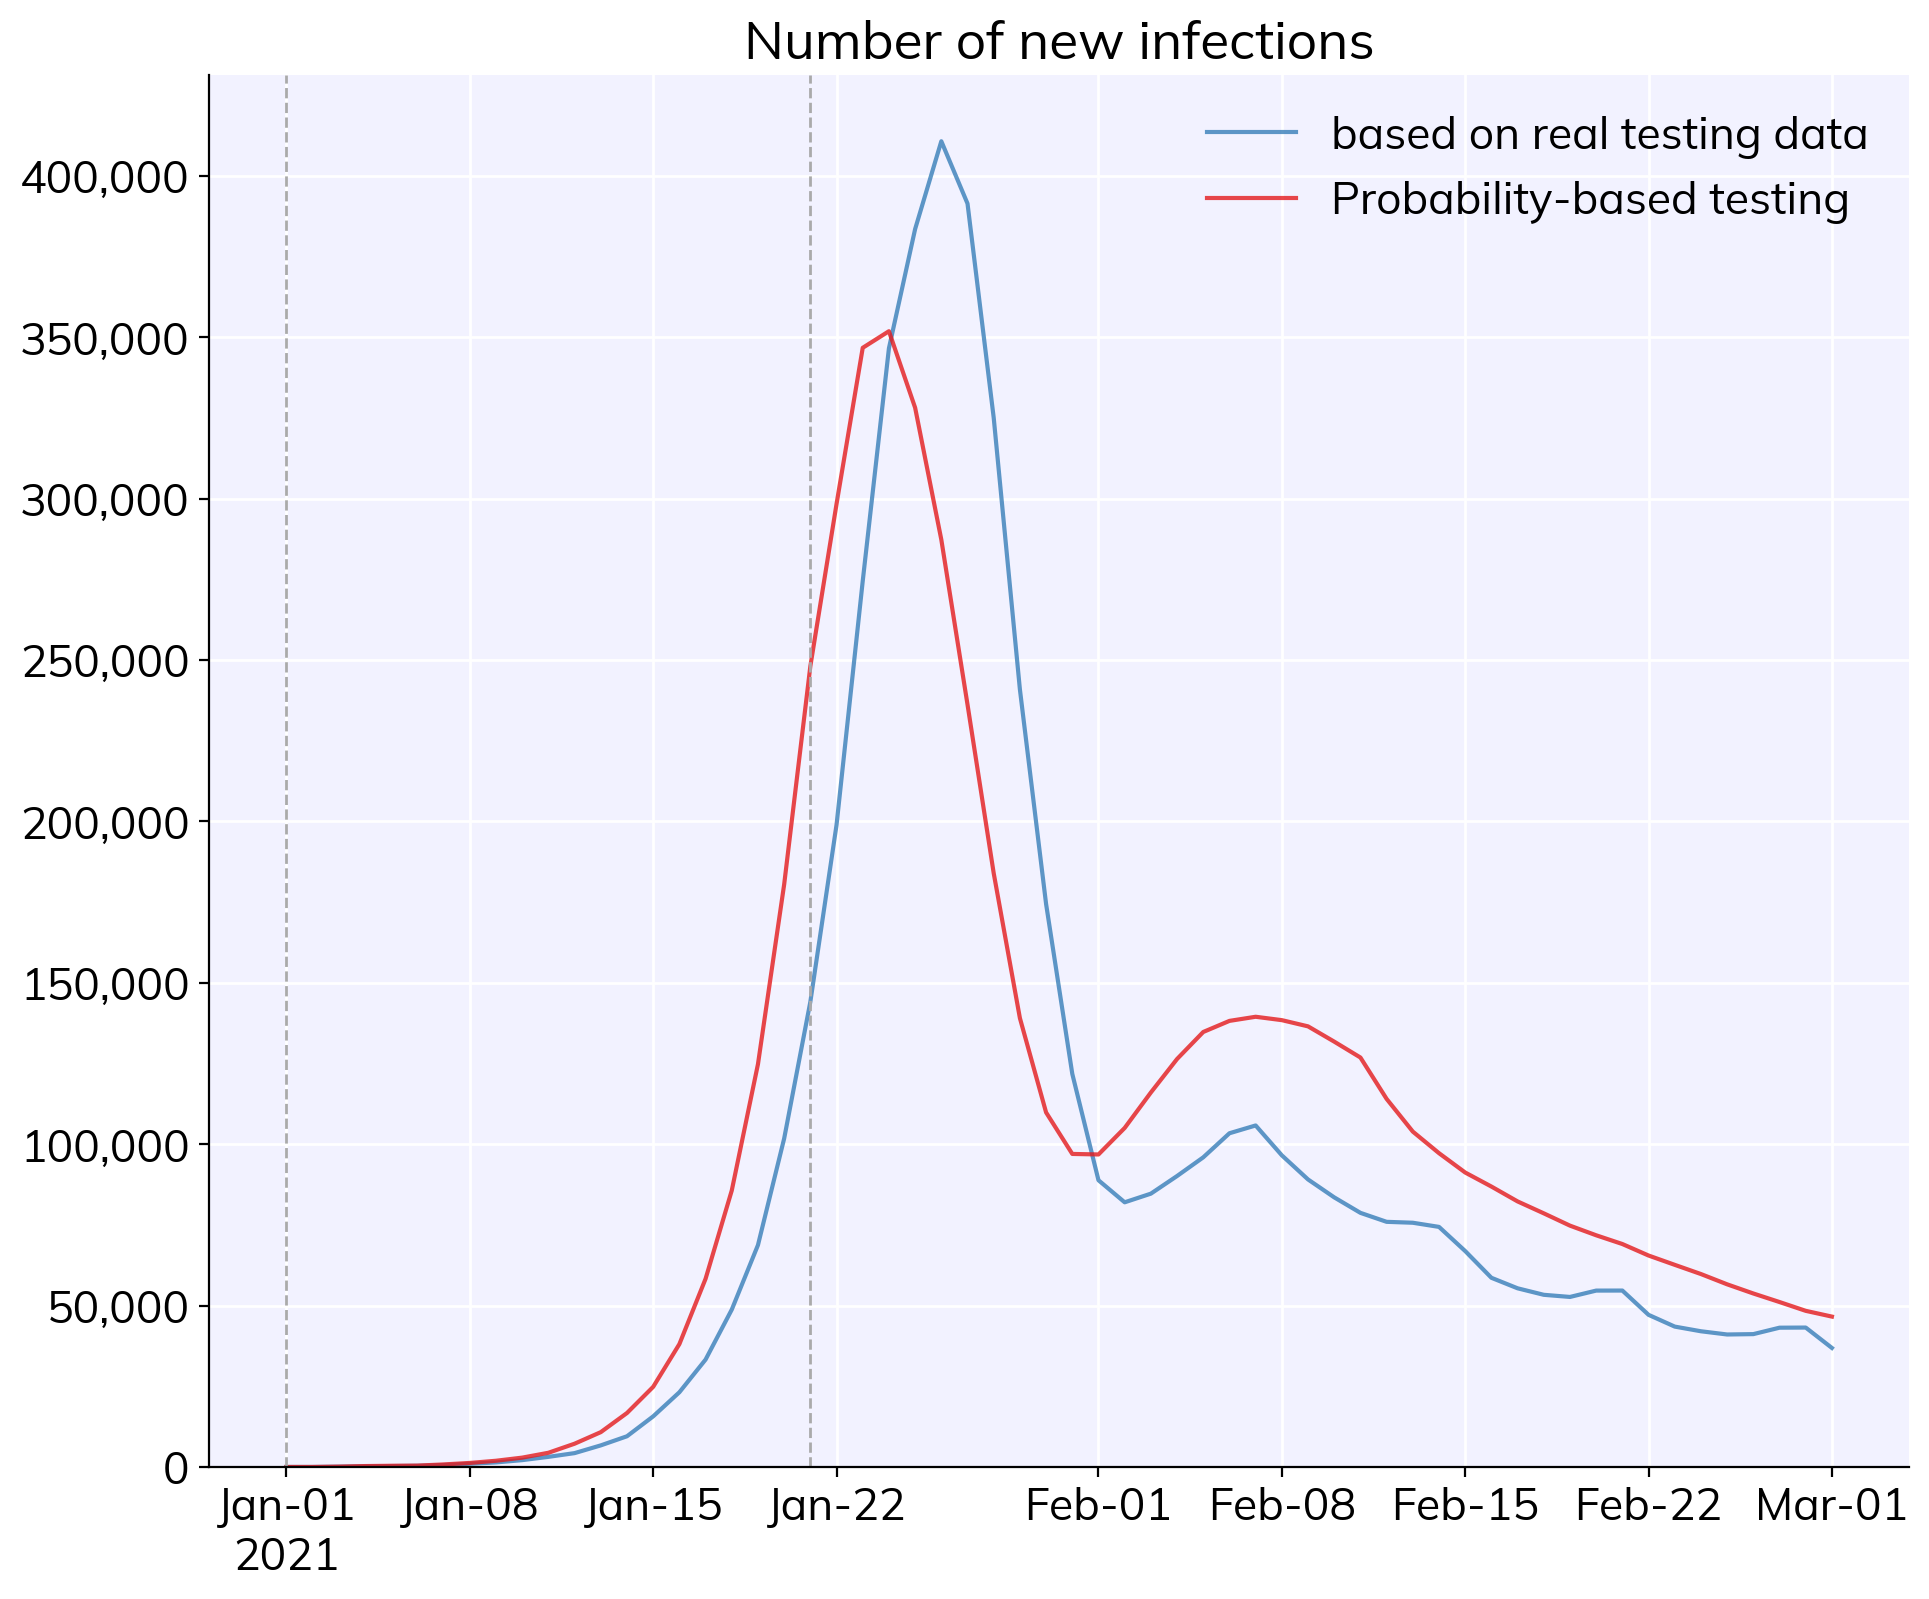

In [49]:
import covasim as cv
import matplotlib.pyplot as plt
# Define the testing interventions
tn_data = cv.test_num('data')
#tn_fixed = cv.test_num(daily_tests=500, start_day='2021-01-01')
tp = cv.test_prob(symp_prob=0.9, asymp_prob=0.001, start_day='2021-01-01')

# Define the default parameters
pars = dict(
        pop_size       = 3370418,
        start_day = '2021-01-01',
        end_day   = '2021-03-01',
        beta           = 0.19, #Gained from calibration
        rel_death_prob = 0.7, #Gained from calibration
        #interventions  = cv.test_num(daily_tests='data'), # adding number of daily test as an intervention
        verbose        = 0,
        pop_type  = 'hybrid',
        rand_seed = 96, # Random seed for reproducibility
        pop_infected = 200, #Intial infected population
)


# Define the simulations
sim1 = cv.Sim(pars, datafile='covid_CA_jan_feb.csv', interventions=tn_data, label='based on real testing data')
msim1 = cv.MultiSim(sim1)
#sim2 = cv.Sim(pars, interventions=tn_fixed, label='Constant daily number of tests')
sim3 = cv.Sim(pars, interventions=[tp,pfizer],label='Probability-based testing')
msim3 = cv.MultiSim(sim3)
# Run and plot results
msim = cv.parallel(sim1,sim3)
# msim1.plot(['new_infections'])
# msim3.plot(['new_infections'])
msim.plot(['new_infections'])

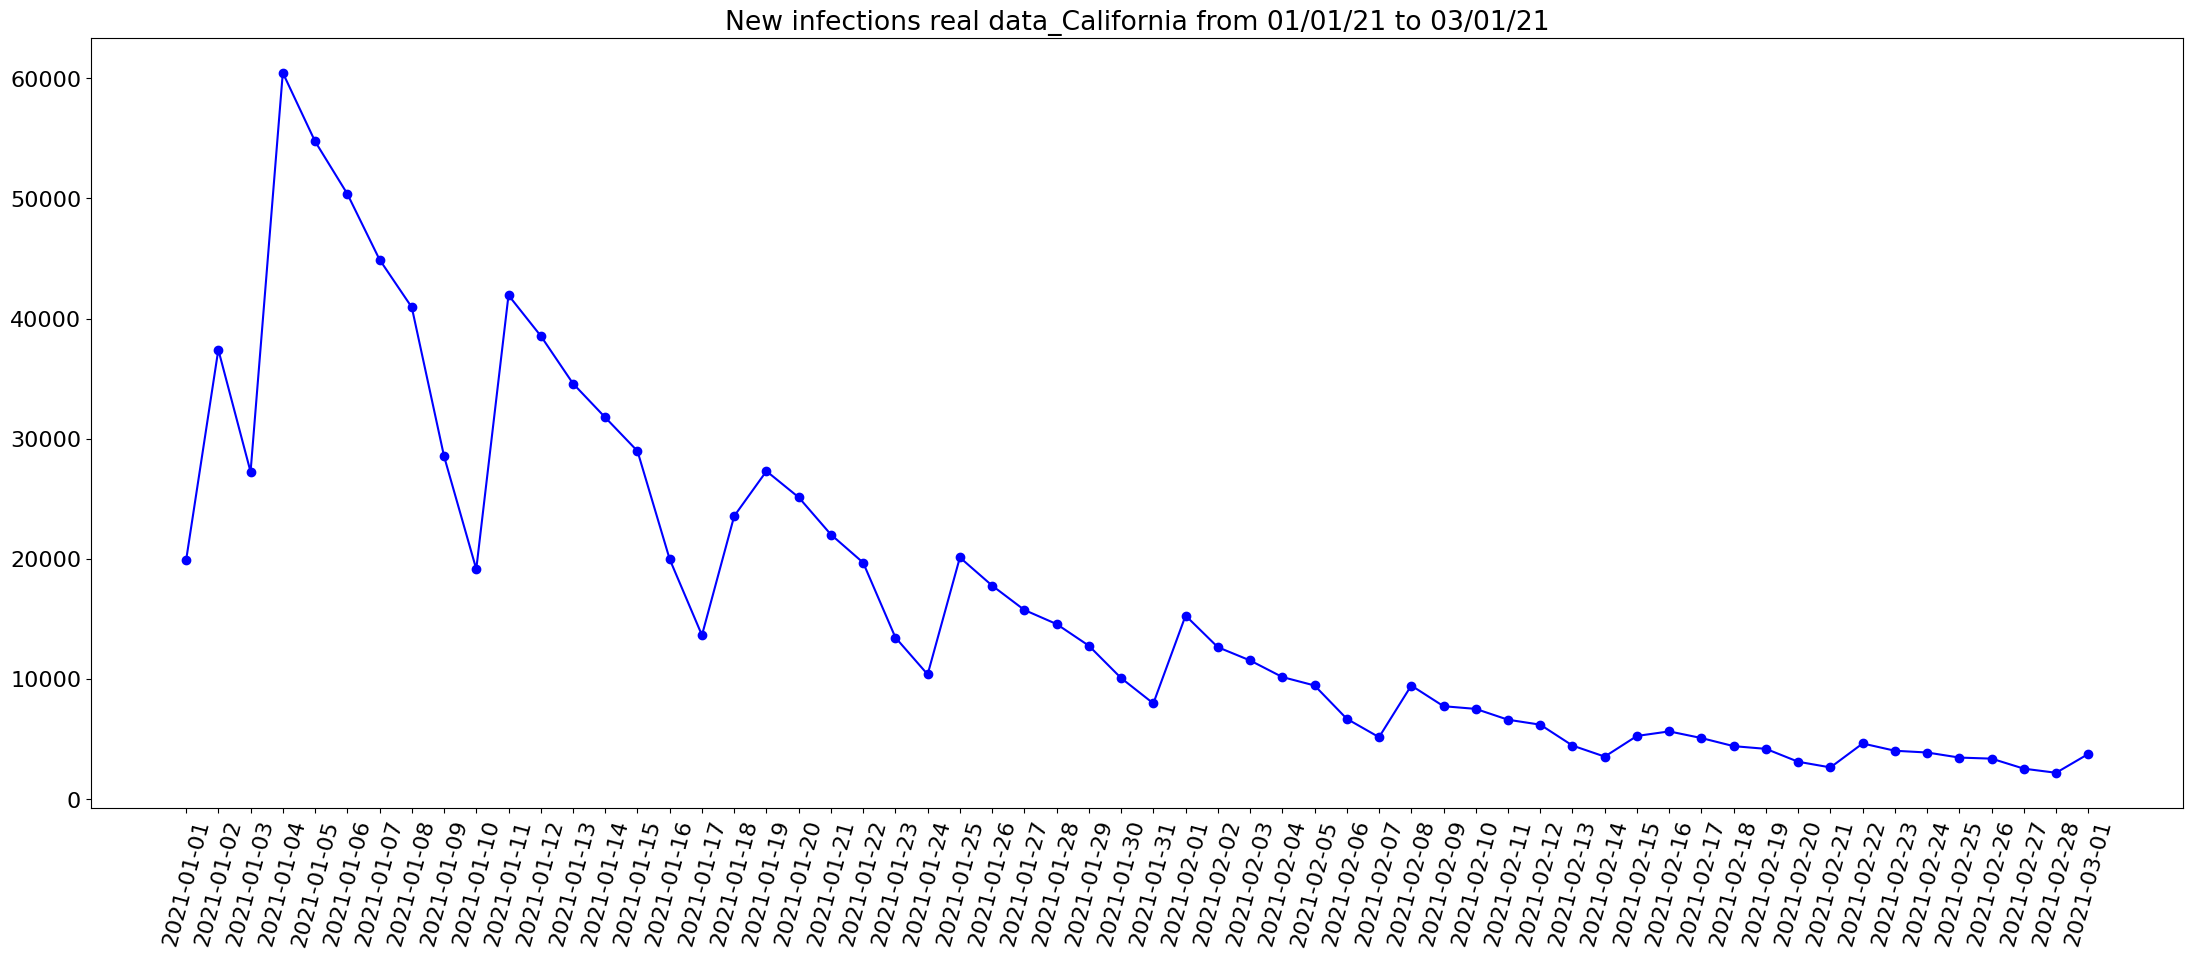

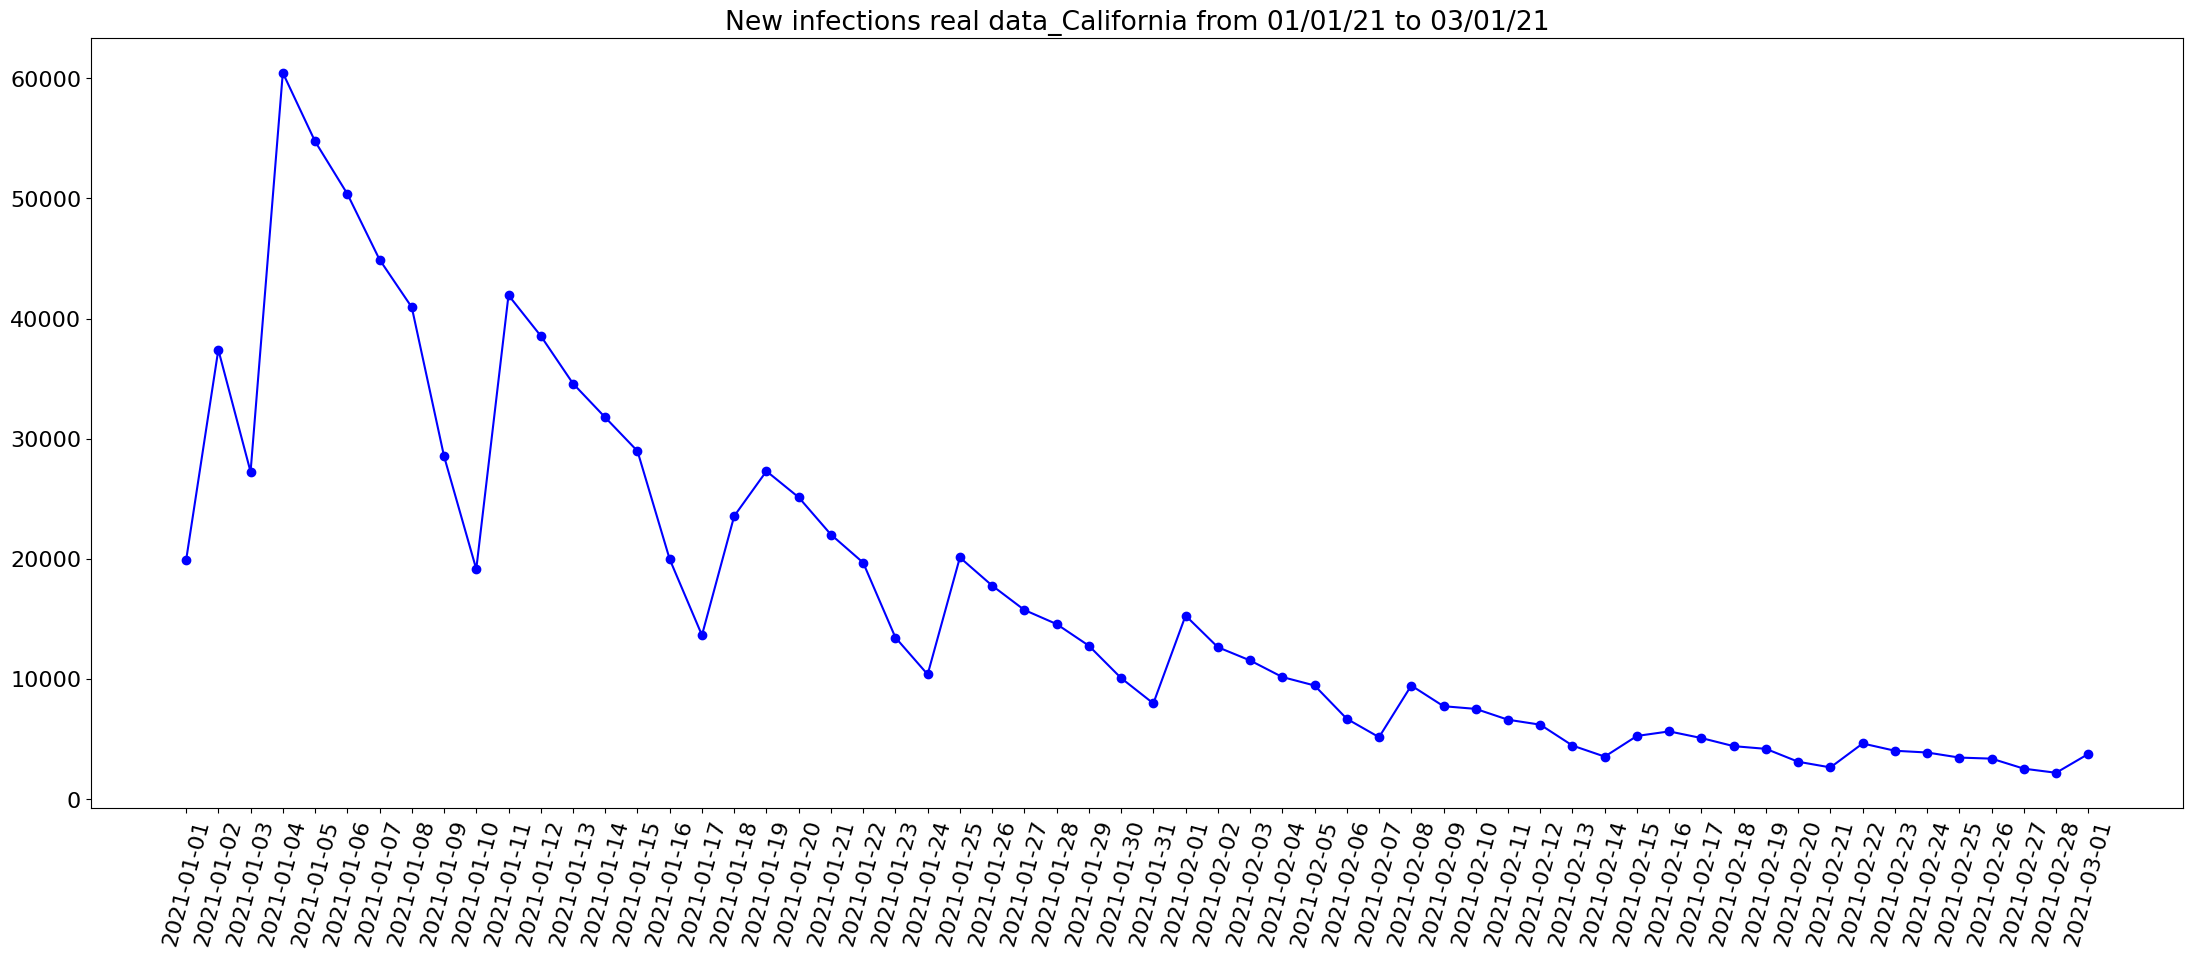

In [19]:
# Let's try plotting real data 
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 16})
plt.xticks(rotation = 75)
plt.title("New infections real data_California from 01/01/21 to 03/01/21") 
plt.plot(cal_df['date'], cal_df['new_diagnoses'], label='Real infections', marker='o', linestyle='-', color='b')
plt.show()

### Cumulative Deaths

<Figure size 21500x800 with 0 Axes>

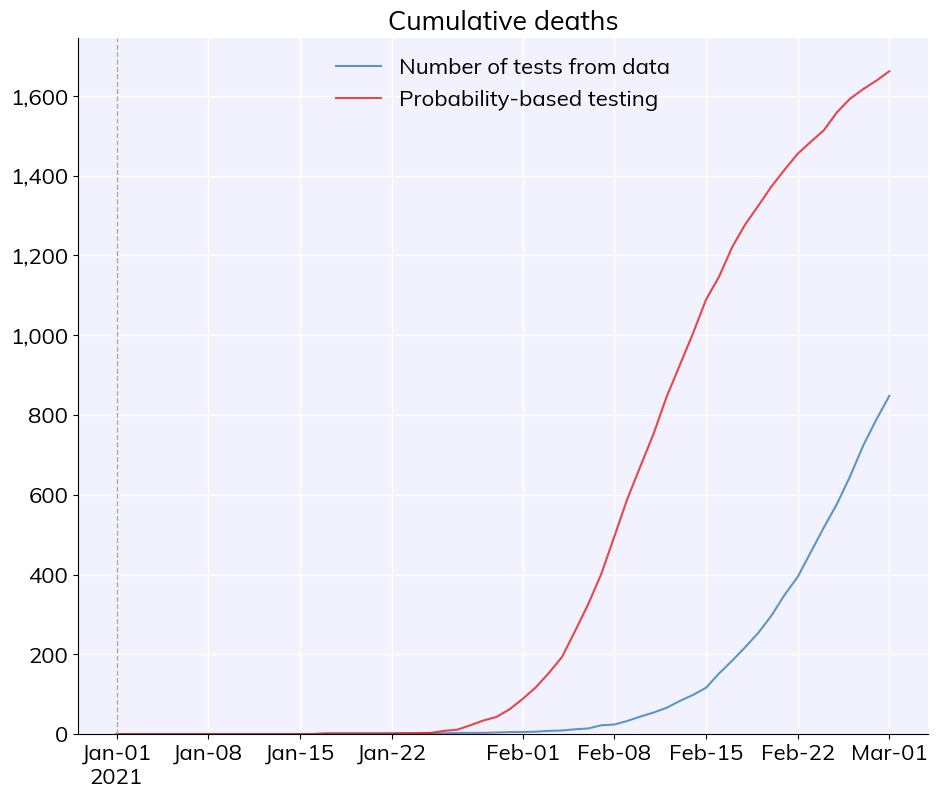

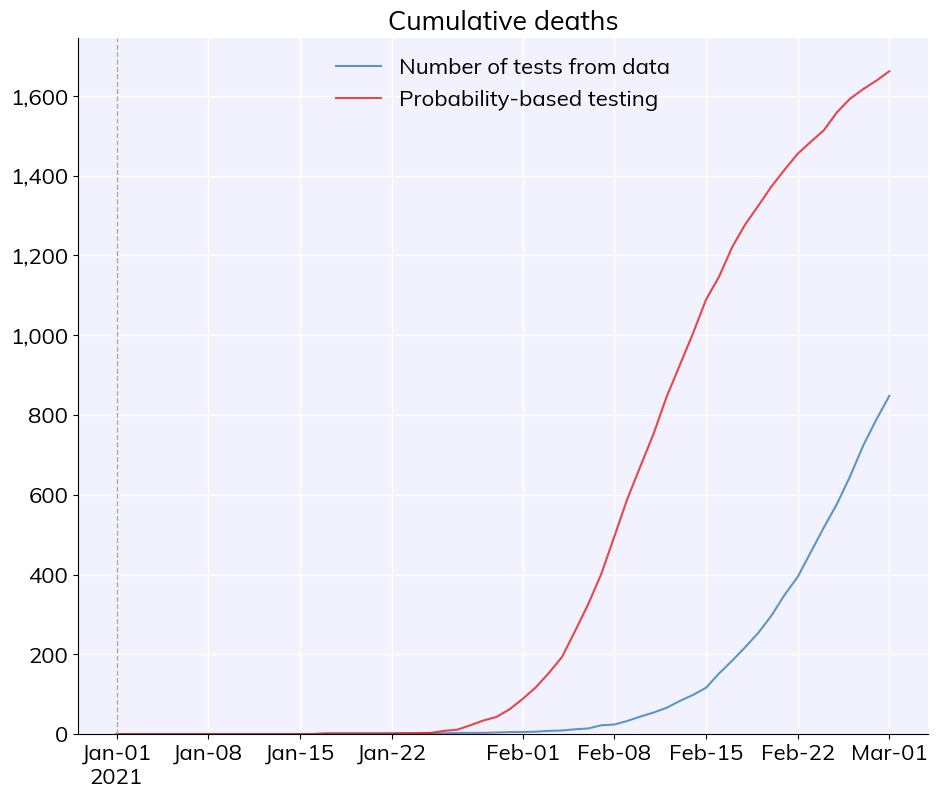

In [24]:
#Plot diagnoses
plt.figure(figsize = (215,8))
msim.plot(['cum_deaths'])


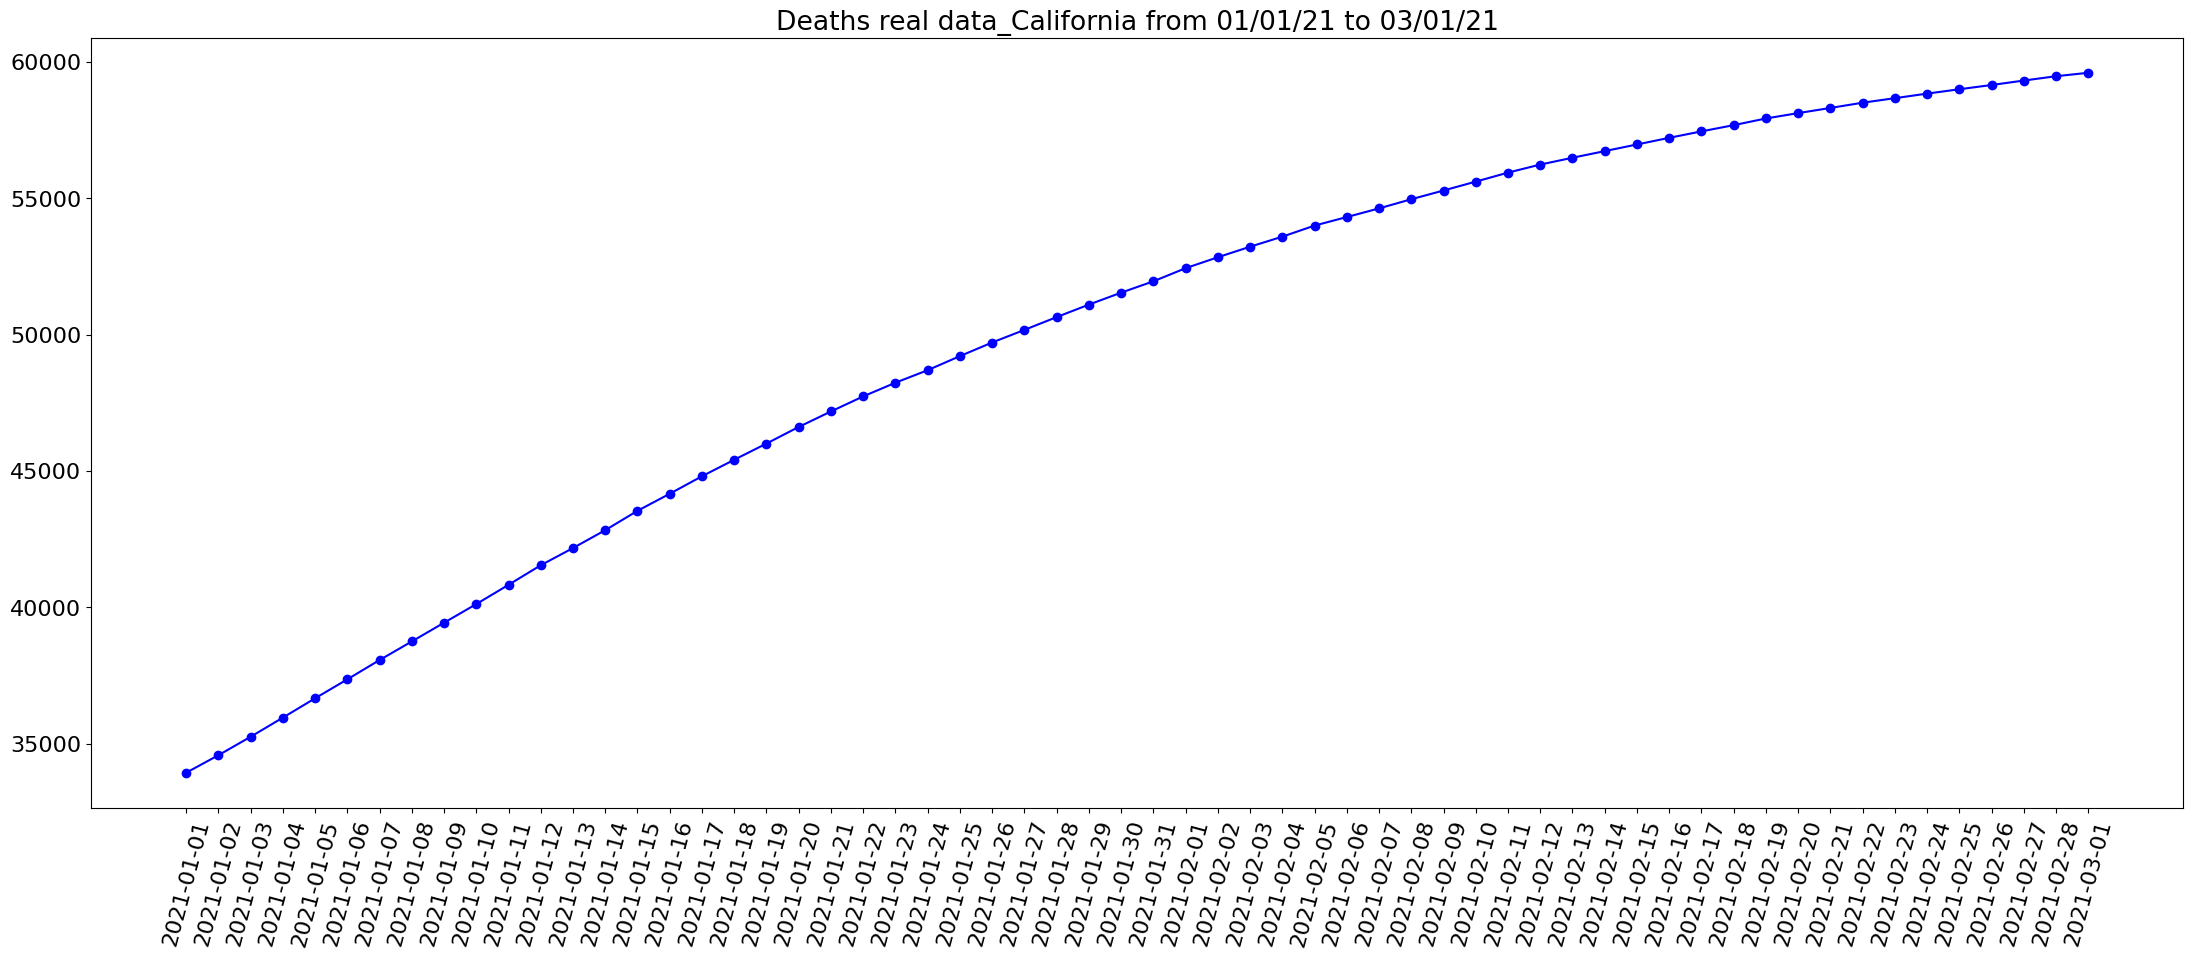

In [14]:
#Let's try plotting real data 
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 16})
plt.xticks(rotation = 75)
plt.title("Deaths real data_California from 01/01/21 to 03/01/21") 
plt.plot(cal_df['date'], cal_df['cumulative_deaths'], label='Real infections', marker='o', linestyle='-', color='b')
plt.show()

### Cumulative diaganosis 

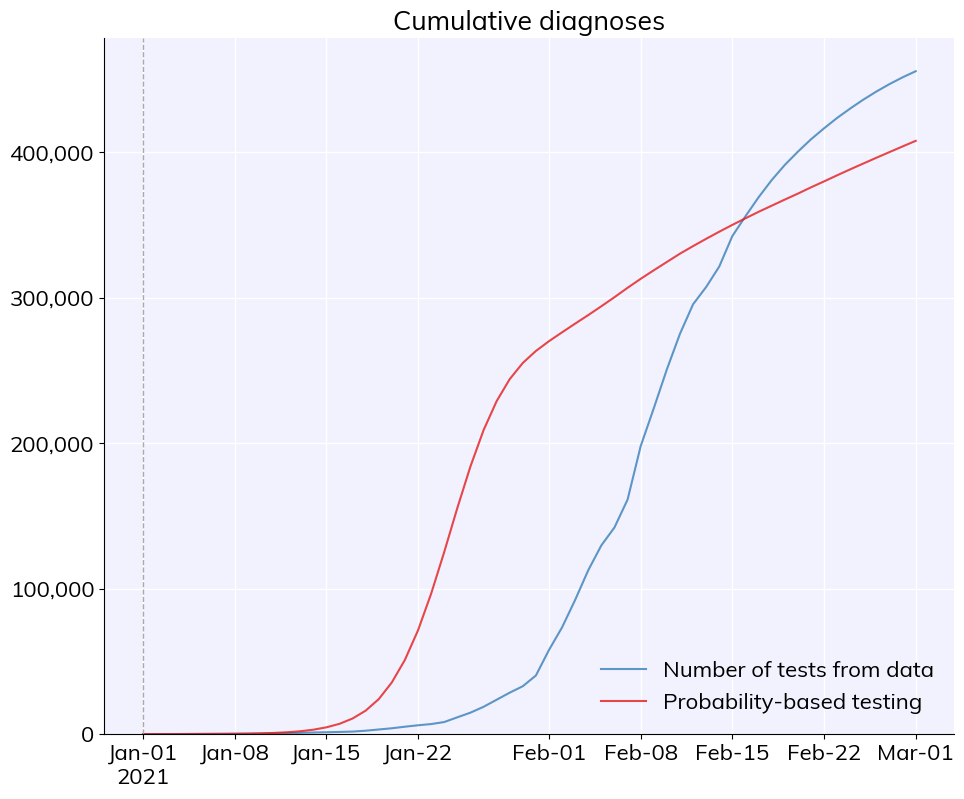

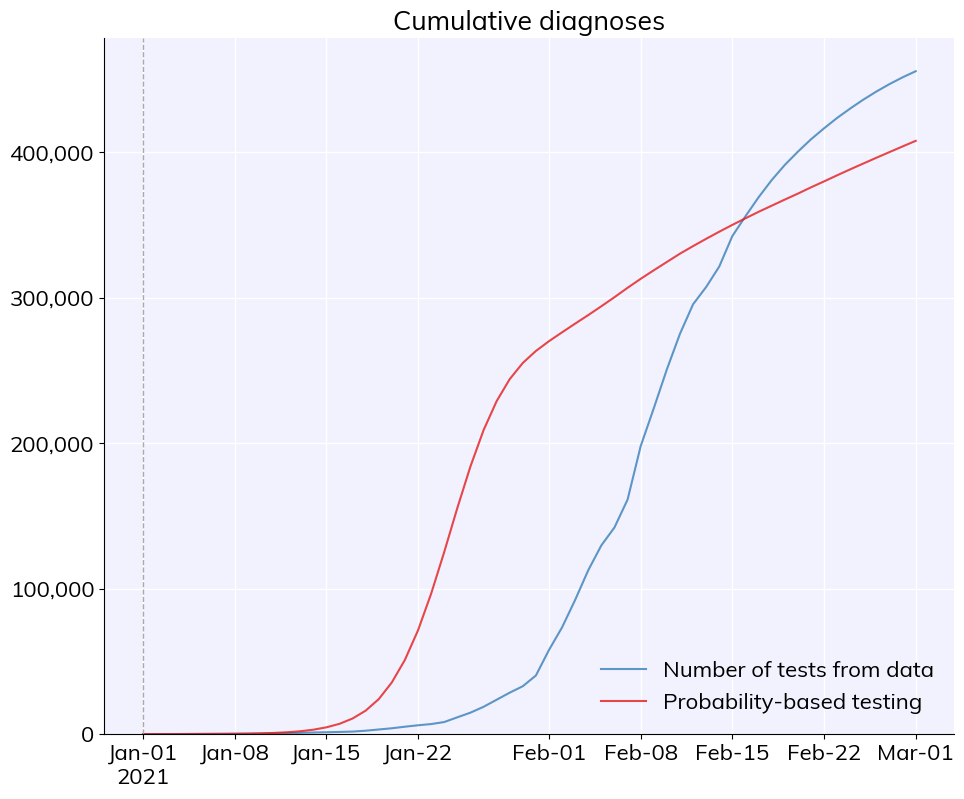

In [25]:
#Plot diagnoses

msim.plot(['cum_diagnoses'])


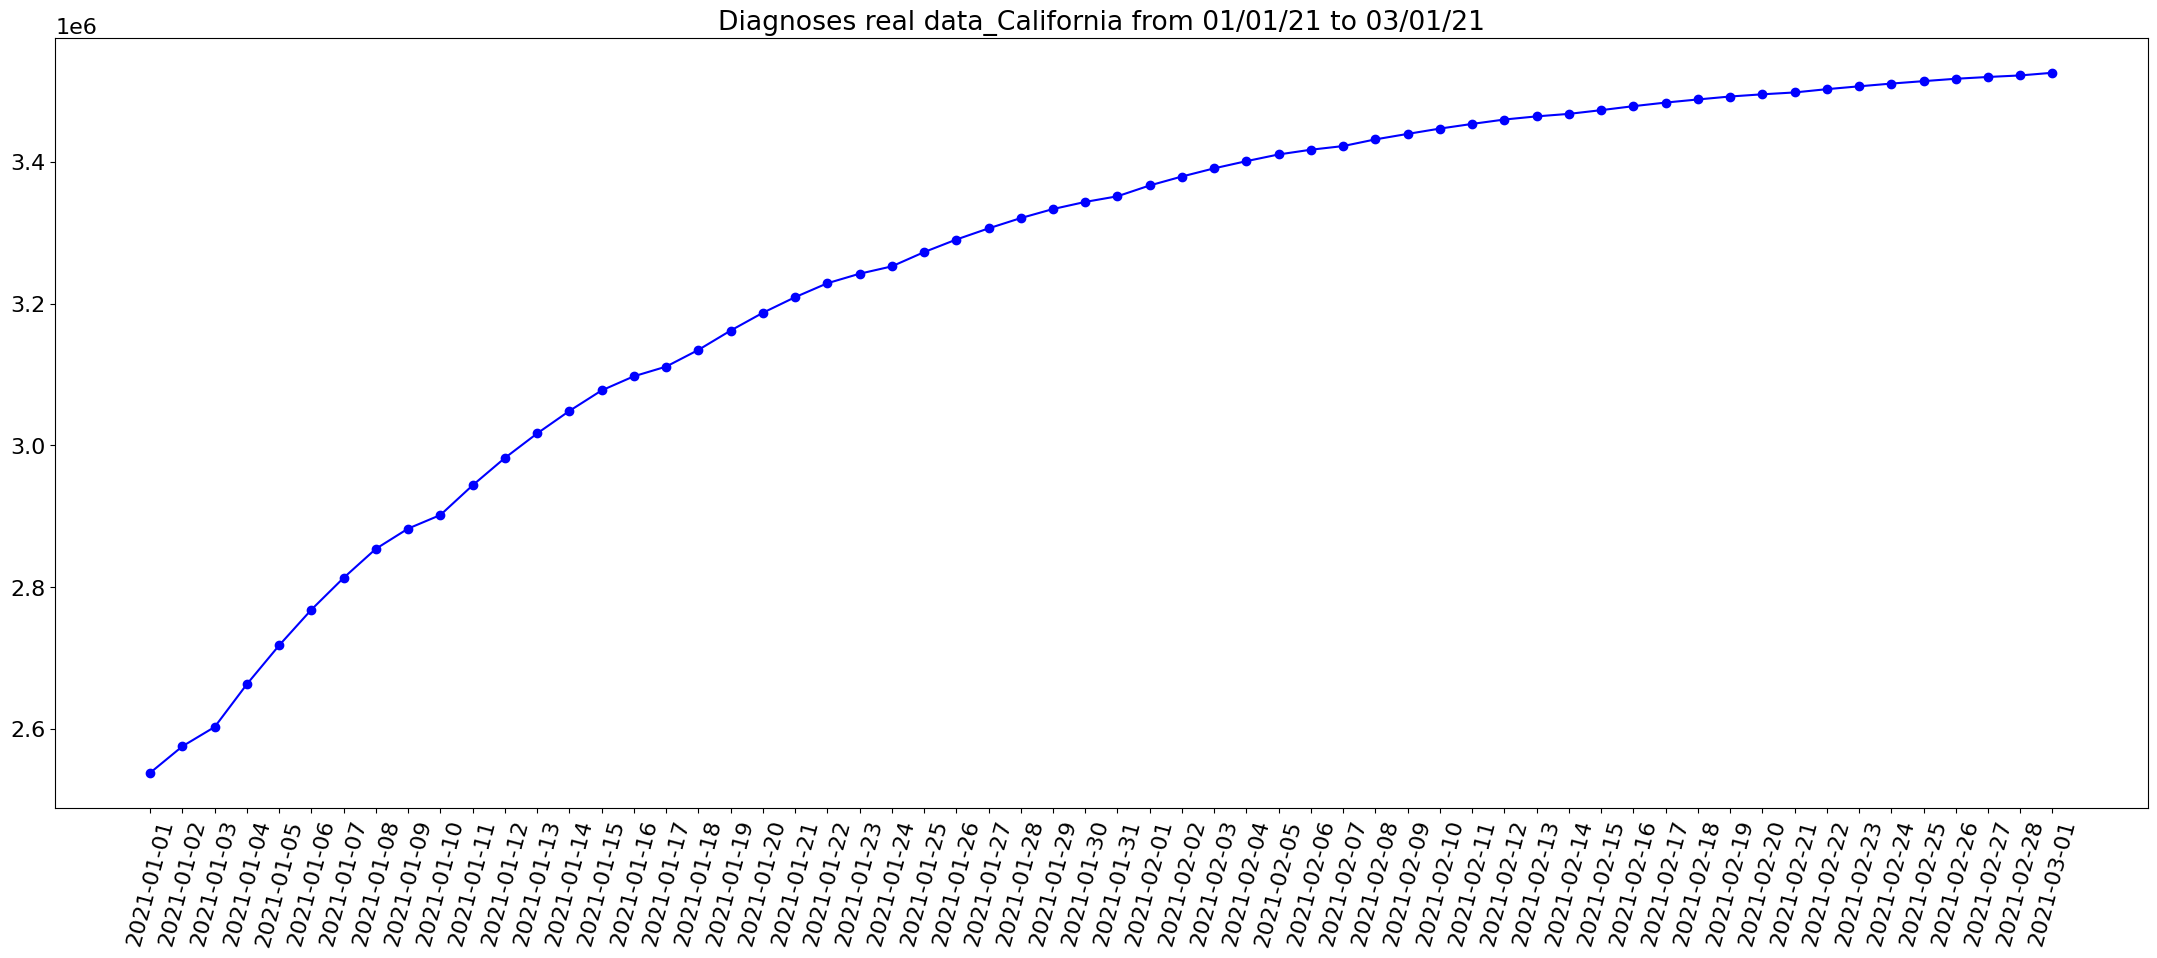

In [16]:
#Let's try plotting real data 
#Let's try plotting real data 
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 16})
plt.xticks(rotation = 75)
plt.title("Diagnoses real data_California from 01/01/21 to 03/01/21") 
plt.plot(cal_df['date'], cal_df['cumulative_cases_new'], label='Real infections', marker='o', linestyle='-', color='b')
plt.show()

## Trying with combination of vaccination + Testing intervention  

In [2]:
# Define probability based vaccination
pfizer = cv.vaccinate_prob(vaccine='pfizer', days=20, prob=0.8)

# With Vaccination
sim_TV = cv.Sim(pars, interventions=[tp,pfizer],label='Probability-based testing+ Pfizer vaccination')

# Without Vaccination
sim_T = cv.Sim(pars, interventions=tp,label='Probability-based testing no vaccination intervention')



# Run and plot results
msim = cv.parallel(sim_TV,sim_T)
# msim1.plot(['new_infections'])
# msim3.plot(['new_infections'])
msim.plot(['new_infections'])


Initializing sim with 400000 people for 59 daysInitializing sim with 400000 people for 59 days



NotImplementedError: Task 0 failed: set die=False to keep going instead; see above for error details

Initializing sim with 20000 people for 60 days
  Running "With age-targeted vaccine": 2020-03-01 ( 0/60) (0.15 s)  ———————————————————— 2%
  Running "With age-targeted vaccine": 2020-03-11 (10/60) (0.19 s)  •••————————————————— 18%
  Running "With age-targeted vaccine": 2020-03-21 (20/60) (0.26 s)  ••••••—————————————— 34%
  Running "With age-targeted vaccine": 2020-03-31 (30/60) (0.32 s)  ••••••••••—————————— 51%
  Running "With age-targeted vaccine": 2020-04-10 (40/60) (0.39 s)  •••••••••••••——————— 67%
  Running "With age-targeted vaccine": 2020-04-20 (50/60) (0.47 s)  ••••••••••••••••———— 84%
  Running "With age-targeted vaccine": 2020-04-30 (60/60) (0.57 s)  •••••••••••••••••••• 100%

Simulation "With age-targeted vaccine" summary:
       11,666 cumulative infections
          563 cumulative reinfections
        9,380 cumulative infectious
        4,427 cumulative symptomatic cases
          198 cumulative severe cases
           39 cumulative critical cases
        5,131 cumulati

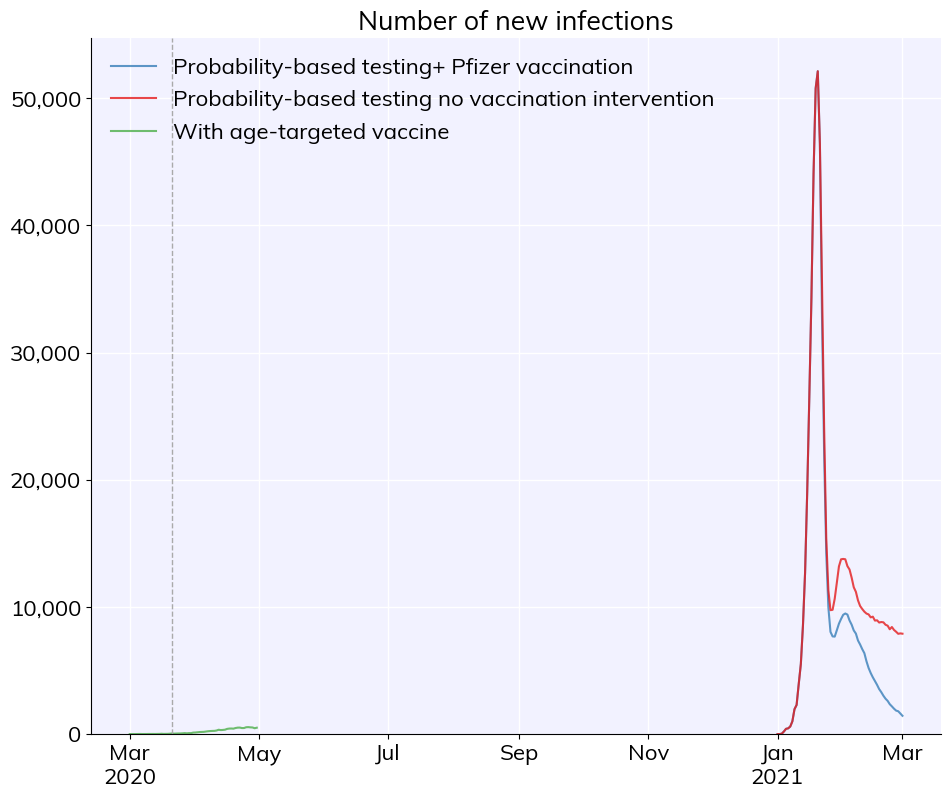

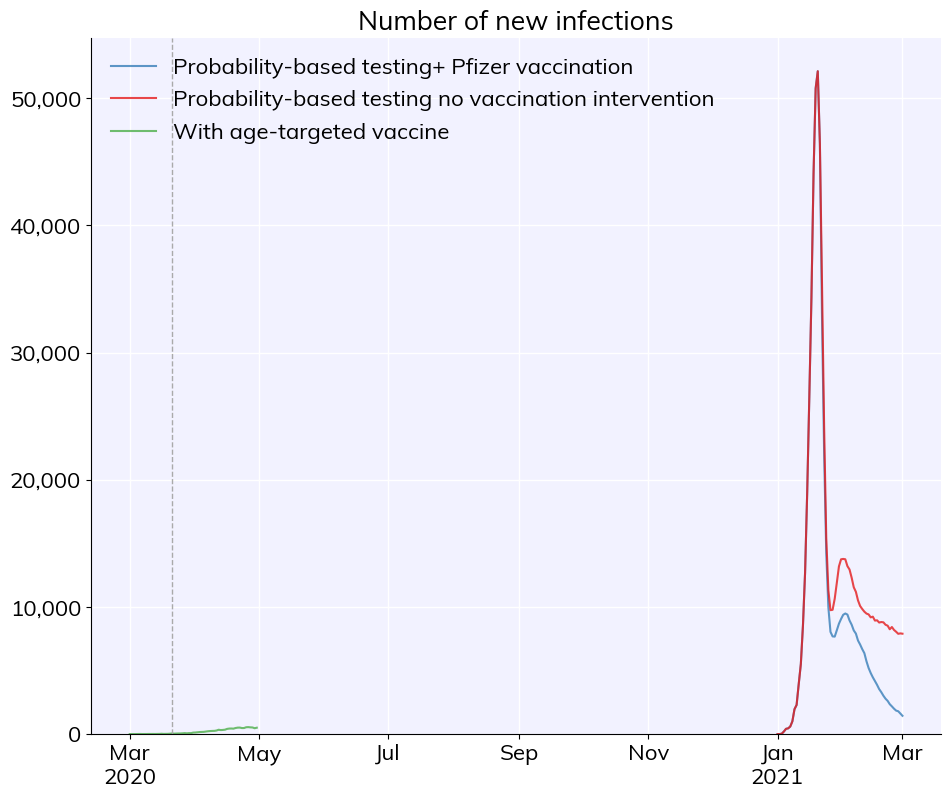

In [33]:
# We can improve the vaccination intervention with sequence(Age) based subtargetting method



# Define the vaccine subtargeting
def vaccinate_by_age(sim):
    young  = cv.true(sim.people.age < 50) # cv.true() returns indices of people matching this condition, i.e. people under 50
    middle = cv.true((sim.people.age >= 50) * (sim.people.age < 75)) # Multiplication means "and" here
    old    = cv.true(sim.people.age >= 75)
    inds = sim.people.uid # Everyone in the population -- equivalent to np.arange(len(sim.people))
    vals = np.ones(len(sim.people)) # Create the array
    vals[young] = 0.1 # 10% probability for people <50
    vals[middle] = 0.5 # 50% probability for people 50-75
    vals[old] = 0.9 # 90% probability for people >75
    output = dict(inds=inds, vals=vals)
    return output

# Define the vaccine
vaccine = cv.simple_vaccine(days=20, rel_sus=0.8, rel_symp=0.06, subtarget=vaccinate_by_age)

# Create, run, and plot the simulations
sim_TVS = cv.Sim(interventions=vaccine, label='With age-targeted vaccine')
# Run and plot results
msim = cv.parallel(sim_TV,sim_T,sim_TVS)
# msim1.plot(['new_infections'])
# msim3.plot(['new_infections'])
msim.plot(['new_infections'])

## Using pre defined params from SIR model

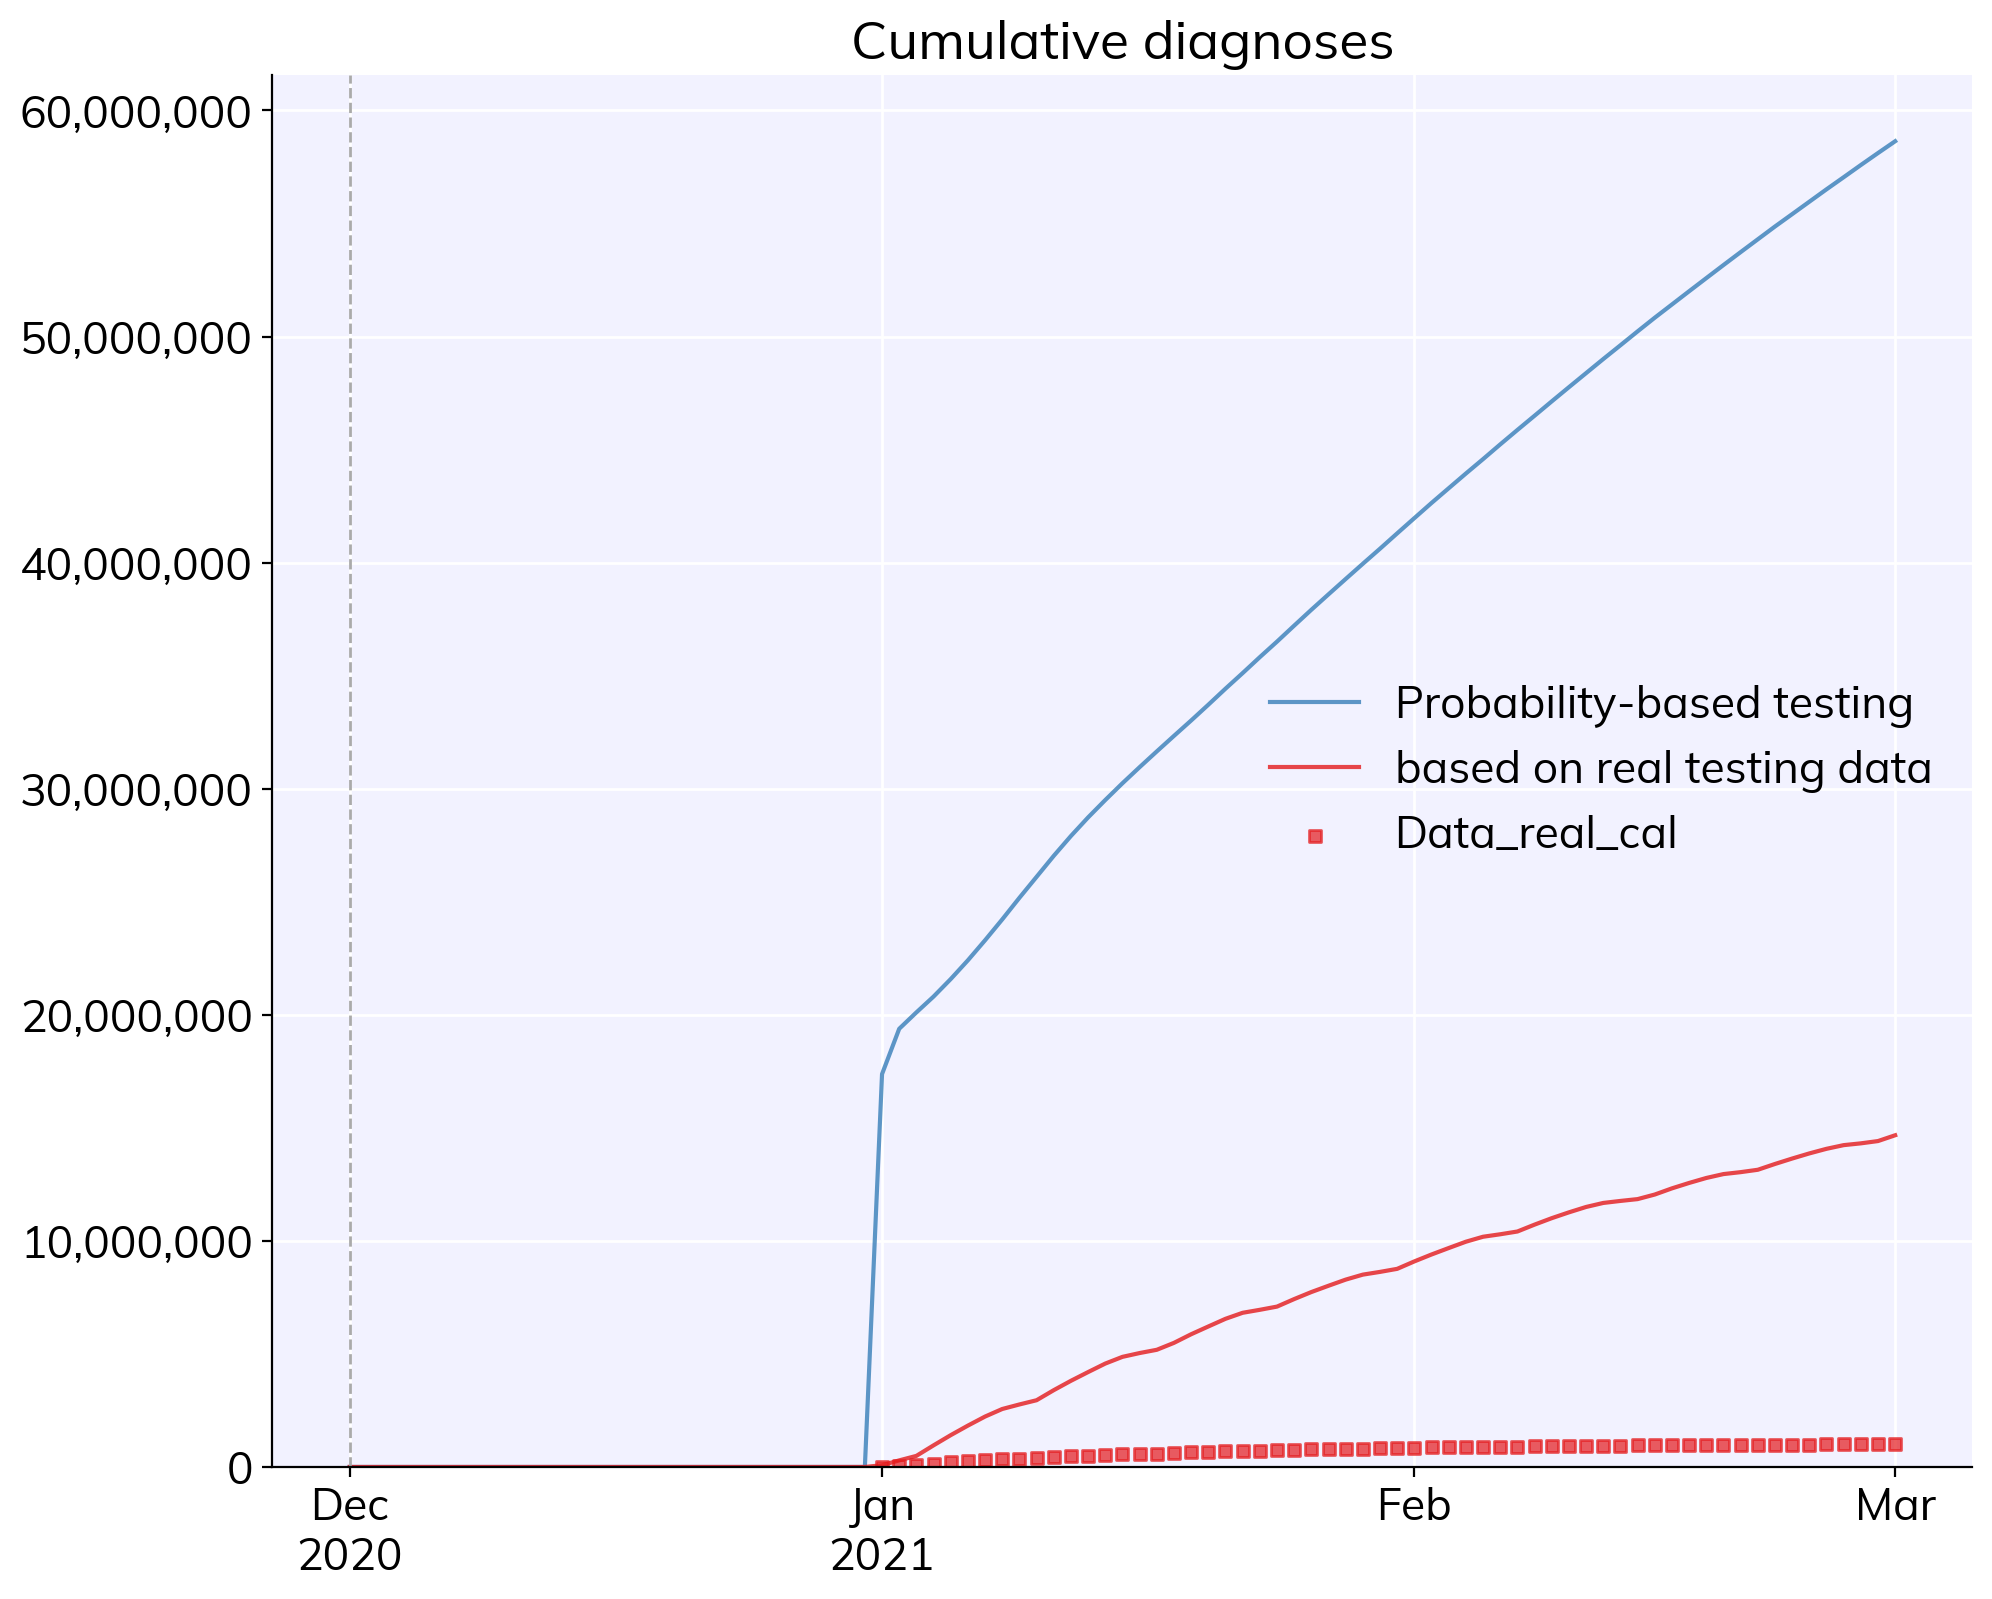

In [48]:
import covasim as cv
import matplotlib.pyplot as plt
# Define the testing interventions
tn_data = cv.test_num('data')
#tn_fixed = cv.test_num(daily_tests=500, start_day='2021-01-01')
tp = cv.test_prob(symp_prob=0.9, asymp_prob=0.001, start_day='2021-01-01')

# Define the default parameters
pars = dict(
        pop_size       = 400000,
        #pop_scale = 100, # Scaling factor, real scaling factor should 100
        start_day = '2020-12-01',
        end_day   = '2021-03-01',
        beta           = 0.41, #from SIR data
        rel_death_prob = 0.7, #Gained from calibration
        pop_type  = 'hybrid',
        rand_seed = 96, # Random seed for reproducibility
        pop_infected = 212, #Intial infected population
        
        
)


# Define the simulations
sim1 = cv.Sim(pars, datafile='covid_CA_jan_feb.csv', interventions=tn_data, label='based on real testing data')
msim1 = cv.MultiSim(sim1)
#sim2 = cv.Sim(pars, interventions=tn_fixed, label='Constant daily number of tests')
sim3 = cv.Sim(pars, interventions=[tp],label='Probability-based testing')
msim3 = cv.MultiSim(sim3)
# Run and plot results
msim = cv.parallel(sim3,sim1)
# msim1.plot(['new_infections'])
# msim3.plot(['new_infections'])
msim.plot(['cum_diagnoses'])

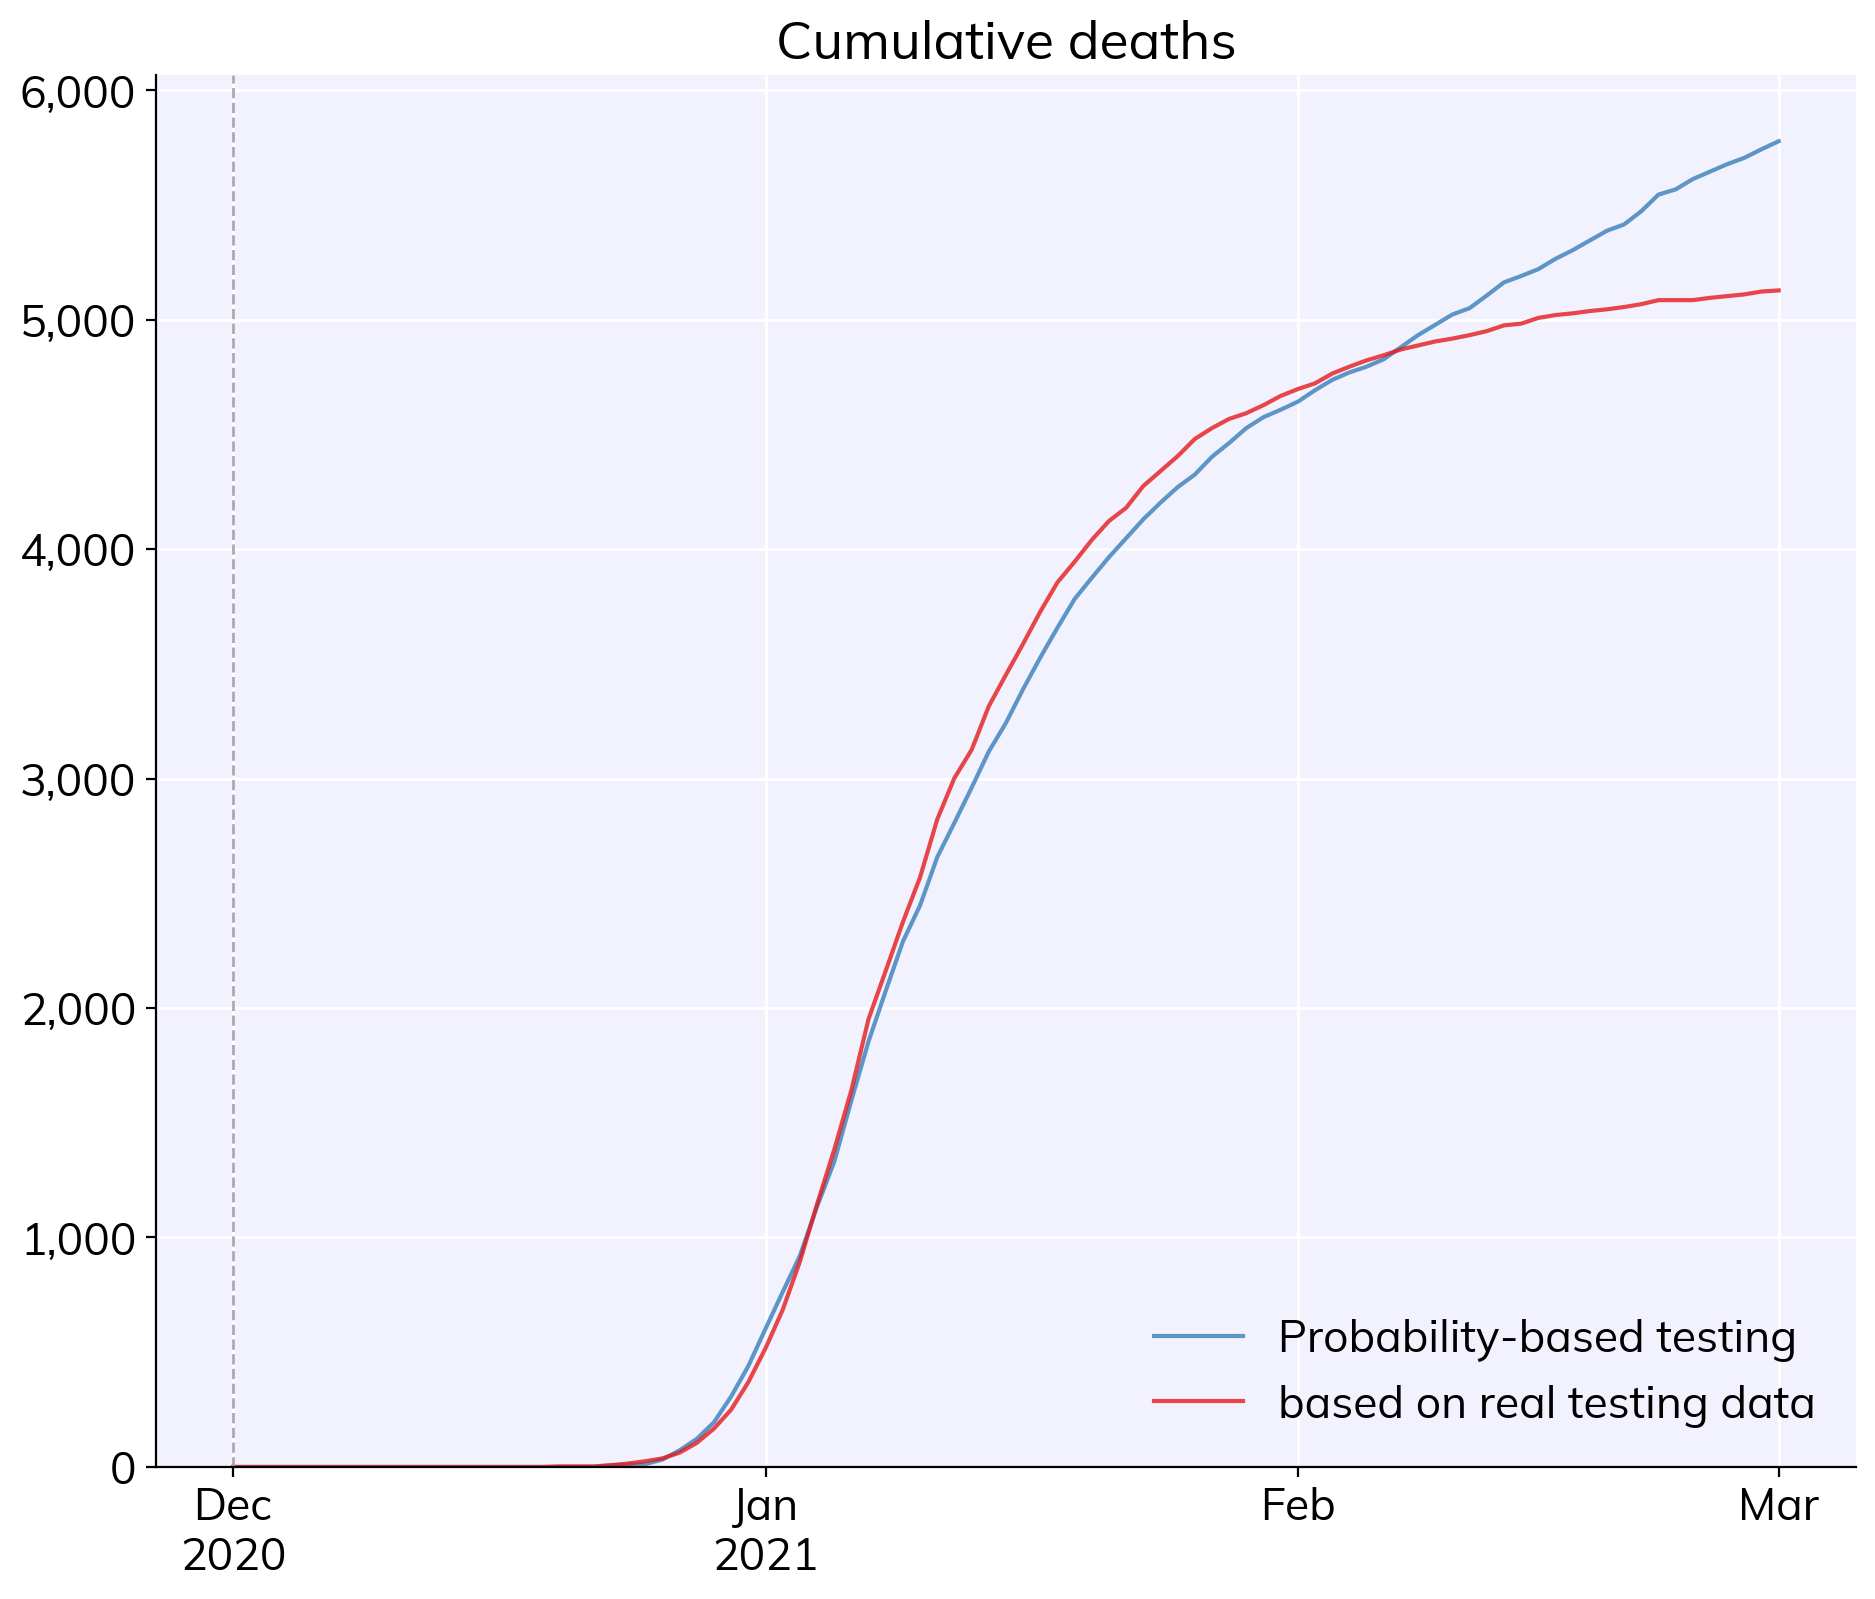

In [47]:
msim.plot(['cum_deaths'])

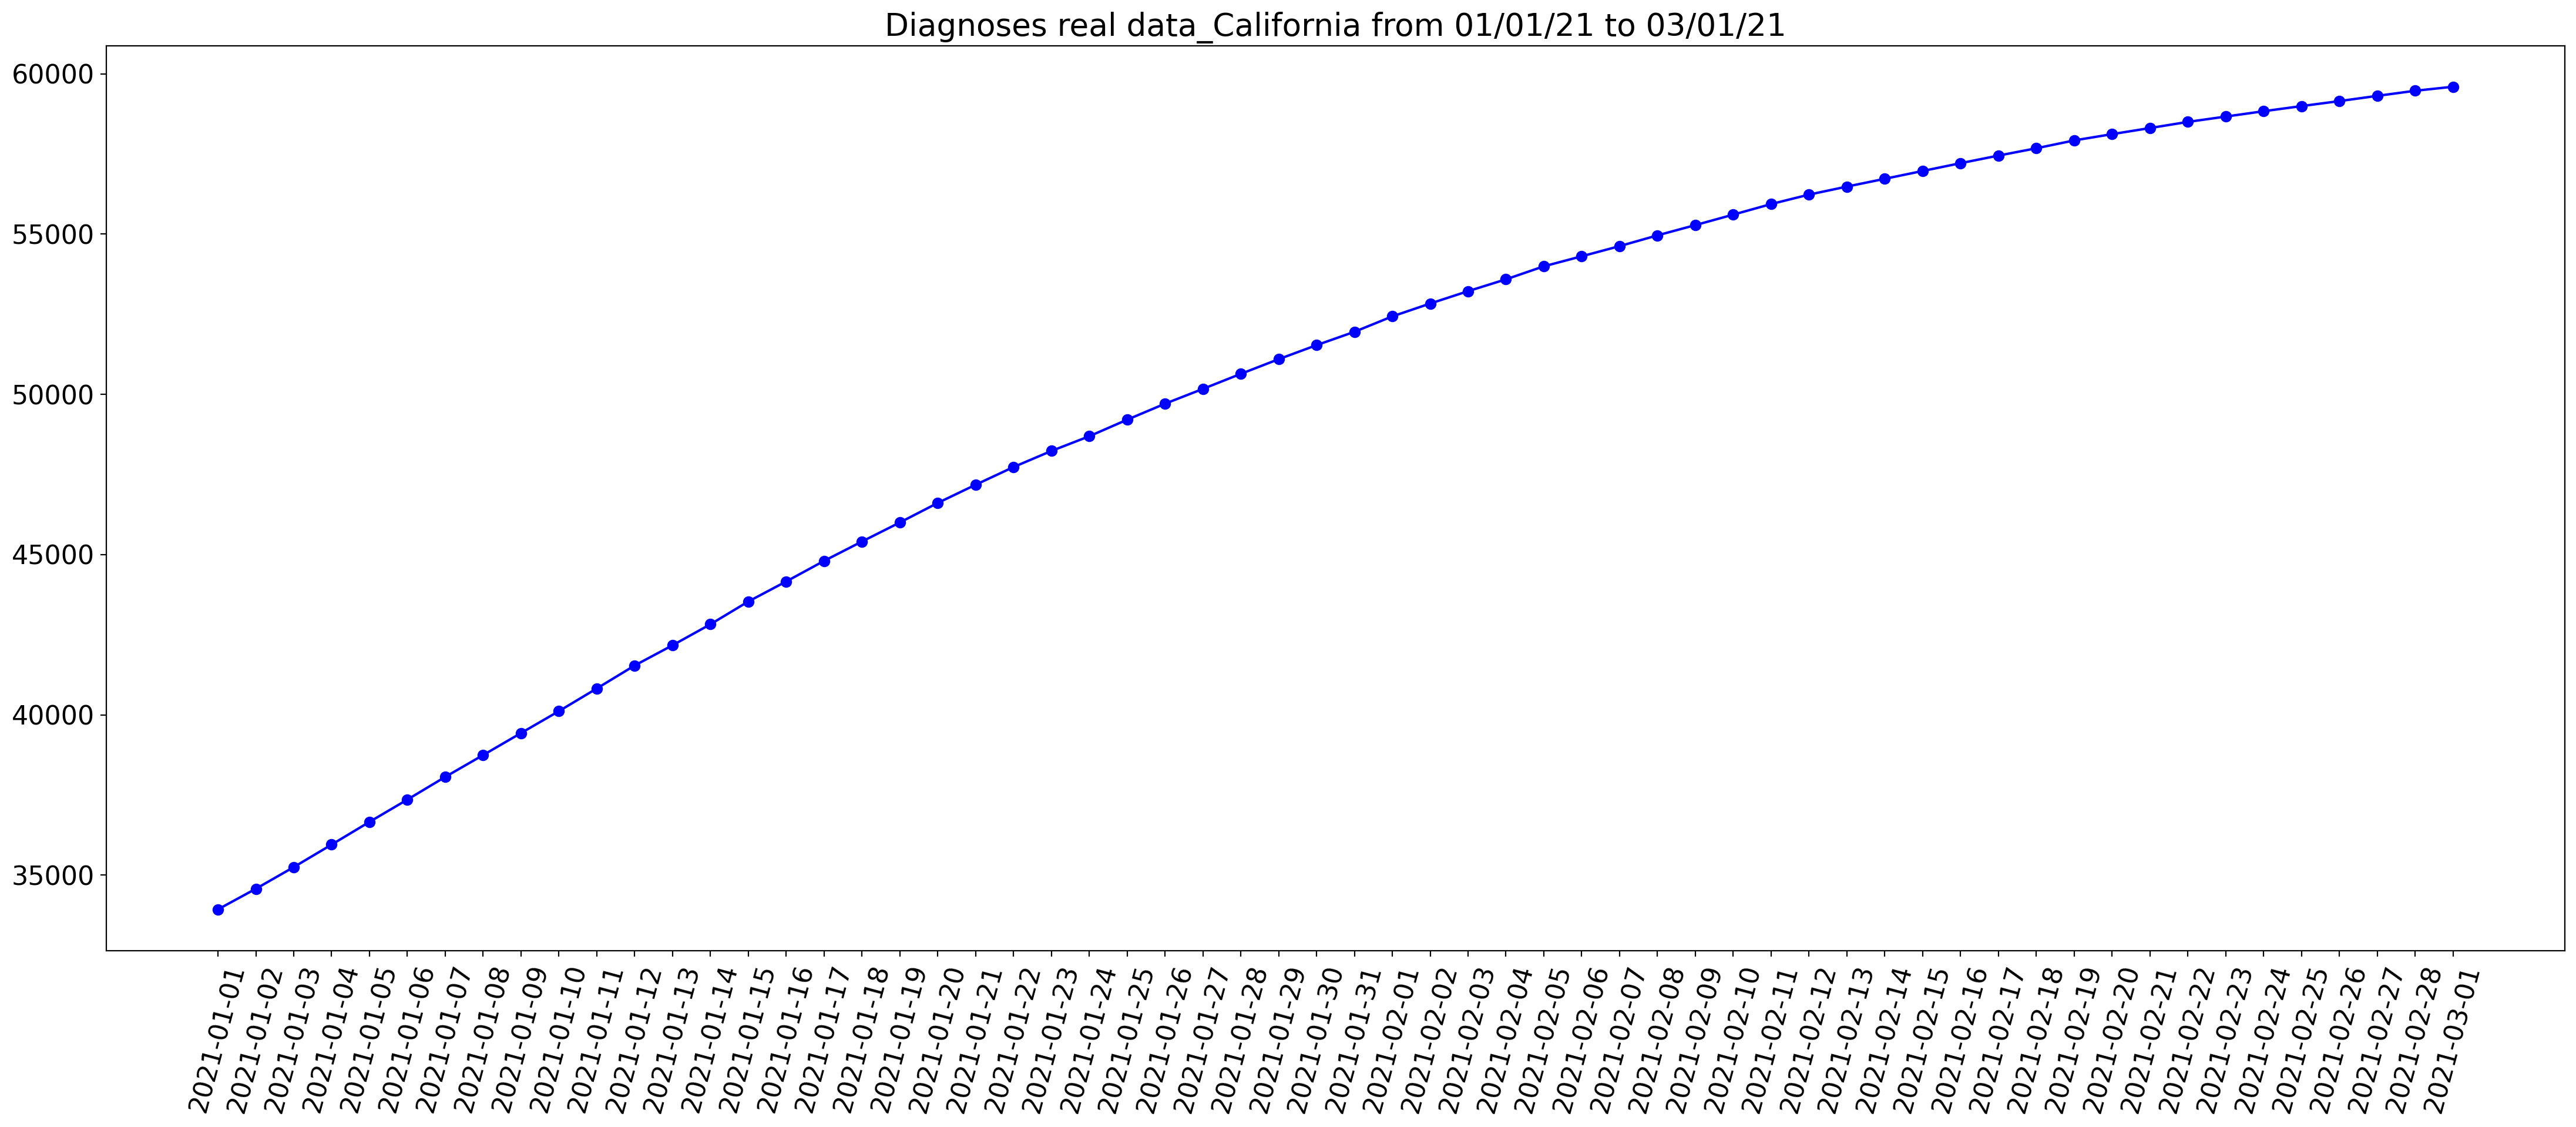

In [39]:
#Let's try plotting real data 
plt.figure(figsize = (27,10))
plt.rcParams.update({'font.size': 16})
plt.xticks(rotation = 75)
plt.title("Diagnoses real data_California from 01/01/21 to 03/01/21") 
plt.plot(cal_df['date'], cal_df['cumulative_deaths'], label='Cum deaths real', marker='o', linestyle='-', color='b')
plt.show()